<a href="https://colab.research.google.com/github/ananyasrivastav/Boston-House-Pricing-Prediction/blob/master/BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats as st
from google.colab import files
import math
files.upload()



Saving HousingData.csv to HousingData.csv


In [13]:
column =  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'];
housingset=pd.read_csv('HousingData.csv')
housing_set=housingset.dropna()
print("Rows before clean : ",housingset.size,"\n")
print("Rows after clean : ",housing_set.size,"\n")
print(housing_set.head())




Rows before clean :  7084 

Rows after clean :  5516 

      CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31   0.0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222     18.7  394.63   2.94  33.4
5  0.02985   0.0   2.18   0.0  0.458  ...  222     18.7  394.12   5.21  28.7

[5 rows x 14 columns]


(394, 14)


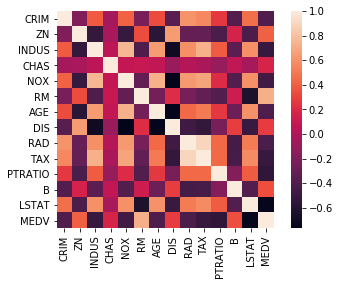

In [20]:
print(housing_set.shape)
x = housing_set.iloc[:,0:13]
y=housing_set['MEDV']
import seaborn as sns
name=[]
cor=housing_set.corr()
sns.heatmap(cor,square = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()



In [0]:
from sklearn.model_selection import train_test_split
#testing data size is of 33% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.33, random_state =5)


In [0]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [0]:
pred_y = lm.predict(x_test)

In [27]:
pd.DataFrame({"Actual": y_test, "Predict": pred_y}).head()

,Actual,Predict
410,15.0,13.877711
232,41.7,38.426015
493,21.8,20.856444
390,15.1,17.757052
404,8.5,7.934827


Text(0, 0.5, 'Predicted Y')

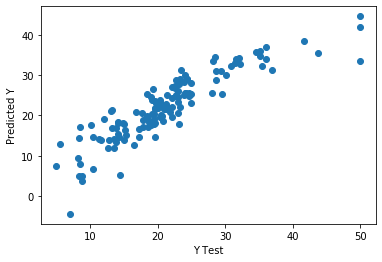

In [28]:
plt.scatter(y_test,pred_y)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [29]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, pred_y)
print(mse)

16.215163064494416
